# Toy 1D Regression Examples (Small n)

In [1]:
%load_ext autoreload
%autoreload 2

import pylab as plt
import pandas as pd
import numpy as np
np.random.seed(0)
import kxy

In [2]:
# Sample size
n = 100 
x = np.arange(-1., 1.01, 1./(2*n))

# Noiseless functions
names = [r'''$y=x$''', r'''$y=\sqrt{|x|}$''', r'''$y=-x^3$''', r'''$y=\tanh\left(\frac{5}{2}u\right)$''']
fs = [lambda u: u, lambda u: -np.sqrt(np.abs(u)), lambda u: (-u)**3, lambda u: np.tanh(2.5*u)]

# Noise configurations
rsqs = np.array([1., .99, .75, .50, .25]) # Desired  Exact R^2
err_var = 1./rsqs-1.
err_std = np.sqrt(err_var) # Implied Exact RMSE assuming 

# Generate the data
data = [[]]*len(rsqs)
for i in range(len(rsqs)):
    dfl = []
    for j in range(len(fs)):
        y_ = fs[j](x)
        y = y_/y_.std()
        y = y + err_std[i]*np.random.randn(x.shape[0])
        z = np.concatenate([y[:, None], x[:, None]], axis=1)
        df = pd.DataFrame(z.copy(), columns=['y', 'x'])
        dfl += [df.copy()]
        
    data[i] = dfl

## Data Valuation

In [3]:
estimated_rsqs = [[None for j in range(len(fs))] for i in range(len(rsqs))]
estimated_rmses = [[None for j in range(len(fs))] for i in range(len(rsqs))]

for i in range(len(rsqs)):
    print('\n\n')
    print(r'''-------------------------------------''')
    print(r'''Exact $R^2$: %.2f, Exact RMSE: %.2f''' % (rsqs[i], err_std[i]))
    print(r'''-------------------------------------''')
    for j in range(len(fs)):
        print()
        print('KxY estimation for %s' % names[j])
        dv = data[i][j].kxy.data_valuation('y', problem_type='regression')
        estimated_rsqs[i][j] = float(dv['Achievable R-Squared'][0])
        estimated_rmses[i][j] = float(dv['Achievable RMSE'][0])
        print(dv)




-------------------------------------
Exact $R^2$: 1.00, Exact RMSE: 0.00
-------------------------------------

KxY estimation for $y=x$
[====================================================================================================] 100% ETA: 0s   
  Achievable R-Squared Achievable Log-Likelihood Per Sample Achievable RMSE
0                 1.00                                 2.11        2.96e-02

KxY estimation for $y=\sqrt{|x|}$
[====================================================================================================] 100% ETA: 0s   
  Achievable R-Squared Achievable Log-Likelihood Per Sample Achievable RMSE
0                 1.00                                 4.31        3.30e-03

KxY estimation for $y=-x^3$
[====================================================================================================] 100% ETA: 0s   
  Achievable R-Squared Achievable Log-Likelihood Per Sample Achievable RMSE
0                 1.00                                 4.3

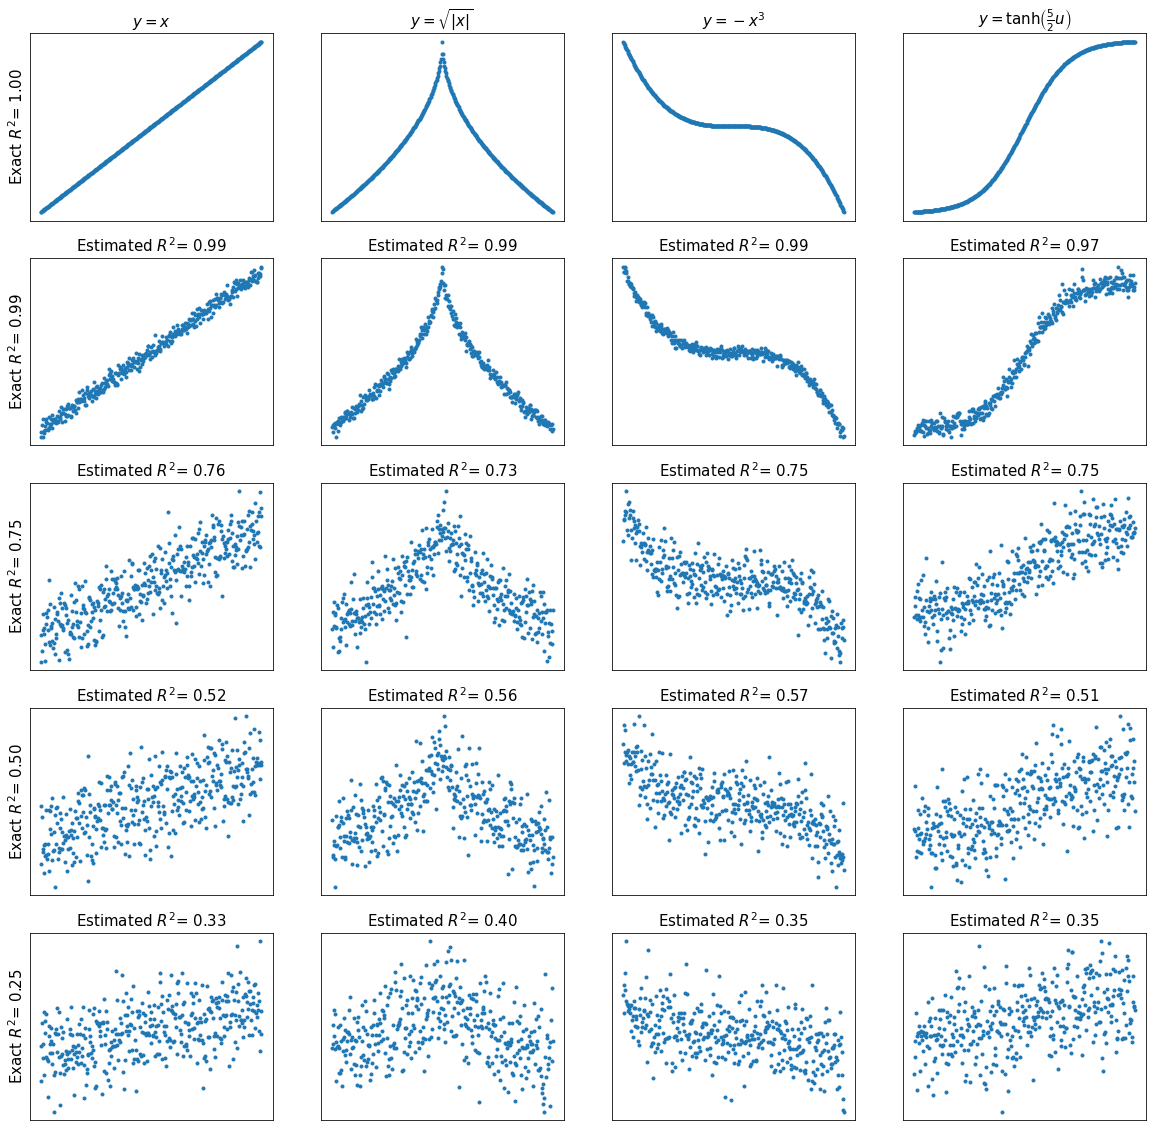

In [4]:
fig, axes = plt.subplots(len(rsqs), len(fs), figsize=(20, 20))
for i in range(len(rsqs)):
    for j in range(len(fs)):
        df = data[i][j].copy()
        y = df['y'].values
        axes[i, j].plot(x, y, '.')
        axes[i, j].set_xticks(())
        axes[i, j].set_yticks(())
        if i == 0:
            axes[i, j].set_title(names[j], fontsize=15)
        else:
            axes[i, j].set_title(r'''Estimated $R^2$= %.2f''' % estimated_rsqs[i][j], fontsize=15)         
        if j == 0:
            axes[i, j].set_ylabel(r'''Exact $R^2$= %.2f''' % rsqs[i], fontsize=15)

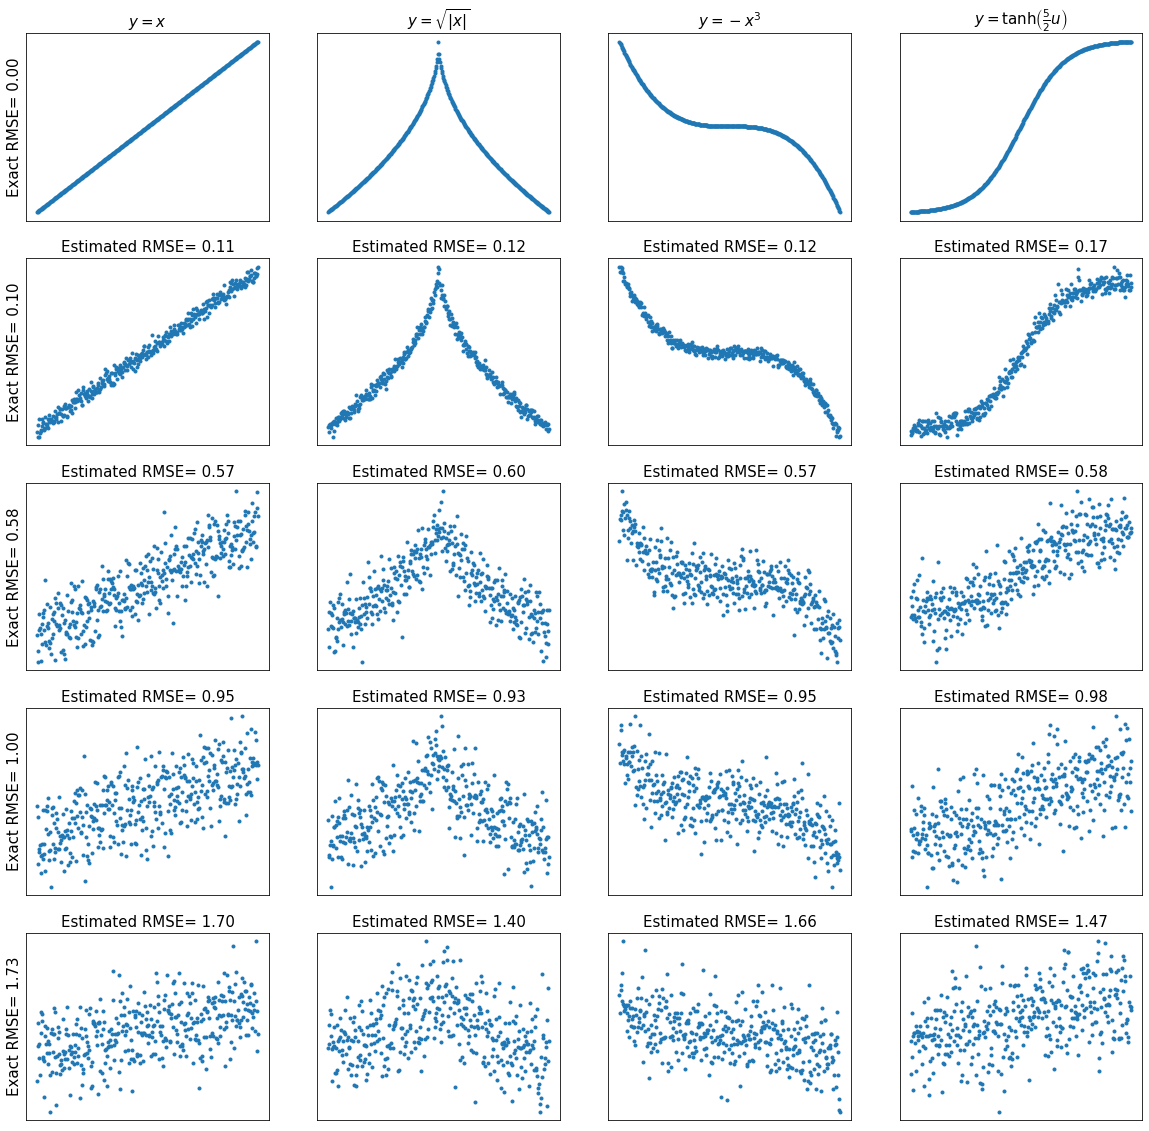

In [5]:
fig, axes = plt.subplots(len(rsqs), len(fs), figsize=(20, 20))
for i in range(len(rsqs)):
    for j in range(len(fs)):
        df = data[i][j].copy()
        y = df['y'].values
        axes[i, j].plot(x, y, '.')
        axes[i, j].set_xticks(())
        axes[i, j].set_yticks(())
        if i == 0:
            axes[i, j].set_title(names[j], fontsize=15)
        else:
            axes[i, j].set_title(r'''Estimated RMSE= %.2f''' % estimated_rmses[i][j], fontsize=15)         
        if j == 0:
            axes[i, j].set_ylabel(r'''Exact RMSE= %.2f''' % err_std[i], fontsize=15)